<center><bold>Eindopdracht voor computer vision, binaire classificatie van hersenscans</bold></center>

In [168]:
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint,seed
from time import time_ns

In [169]:


data_dir = "..\\data"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=486235864,
  image_size=(28, 32),
  batch_size=16)
images_train = []
labels_train = []
for images, labels in train_ds:
    images_train.append(images)
    labels_train.append(labels)

vals_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)




Found 2800 files belonging to 2 classes.
Using 2240 files for training.
Found 2800 files belonging to 2 classes.
Using 560 files for validation.


In [170]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [171]:
hist = model.fit(train_ds, epochs=20,validation_data= vals_ds)

Epoch 1/20
140/140 [==============================] - 7s 44ms/step - loss: 0.4563 - accuracy: 0.7830 - val_loss: 0.3189 - val_accuracy: 0.8714
Epoch 2/20
140/140 [==============================] - 8s 56ms/step - loss: 0.2790 - accuracy: 0.8902 - val_loss: 0.2340 - val_accuracy: 0.9071
Epoch 3/20
140/140 [==============================] - 5s 38ms/step - loss: 0.1863 - accuracy: 0.9228 - val_loss: 0.1669 - val_accuracy: 0.9339
Epoch 4/20
140/140 [==============================] - 5s 39ms/step - loss: 0.0911 - accuracy: 0.9665 - val_loss: 0.1195 - val_accuracy: 0.9625
Epoch 5/20
140/140 [==============================] - 6s 40ms/step - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.1003 - val_accuracy: 0.9714
Epoch 6/20
140/140 [==============================] - 6s 41ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.1520 - val_accuracy: 0.9518
Epoch 7/20
140/140 [==============================] - 6s 41ms/step - loss: 0.0385 - accuracy: 0.9871 - val_loss: 0.0905 - val_accuracy: 0.9768

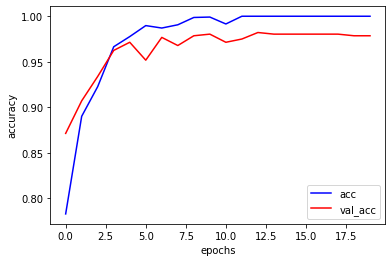

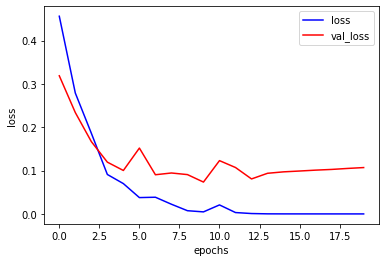

560/560 - 3s - loss: 0.1070 - accuracy: 0.9786 - 3s/epoch - 5ms/step


In [172]:
plt.plot(hist.history["accuracy"],color = "blue")
plt.plot(hist.history["val_accuracy"],color = "red")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["acc", "val_acc"])
plt.show()
plt.plot(hist.history["loss"],color = "blue")
plt.plot(hist.history["val_loss"],color = "red")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["loss", "val_loss"])
plt.show()
test_loss, test_acc = model.evaluate(vals_ds, verbose=2)

In [173]:
print(test_acc)

0.9785714149475098


In [174]:
test_dir = "..\\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)



Found 200 files belonging to 2 classes.
200/200 - 1s - loss: 0.6688 - accuracy: 0.9400 - 1s/epoch - 5ms/step


In [175]:
print(test_acc)

0.9399999976158142


In [176]:
def show_res(img,  res):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(img.shape[0], img.shape[1]))
    ax.imshow(img, cmap='gray')
    if(res == 1):
        ax.set_title('tumor', fontsize=100)
    elif(res == 0):
        ax.set_title('healty', fontsize=100)

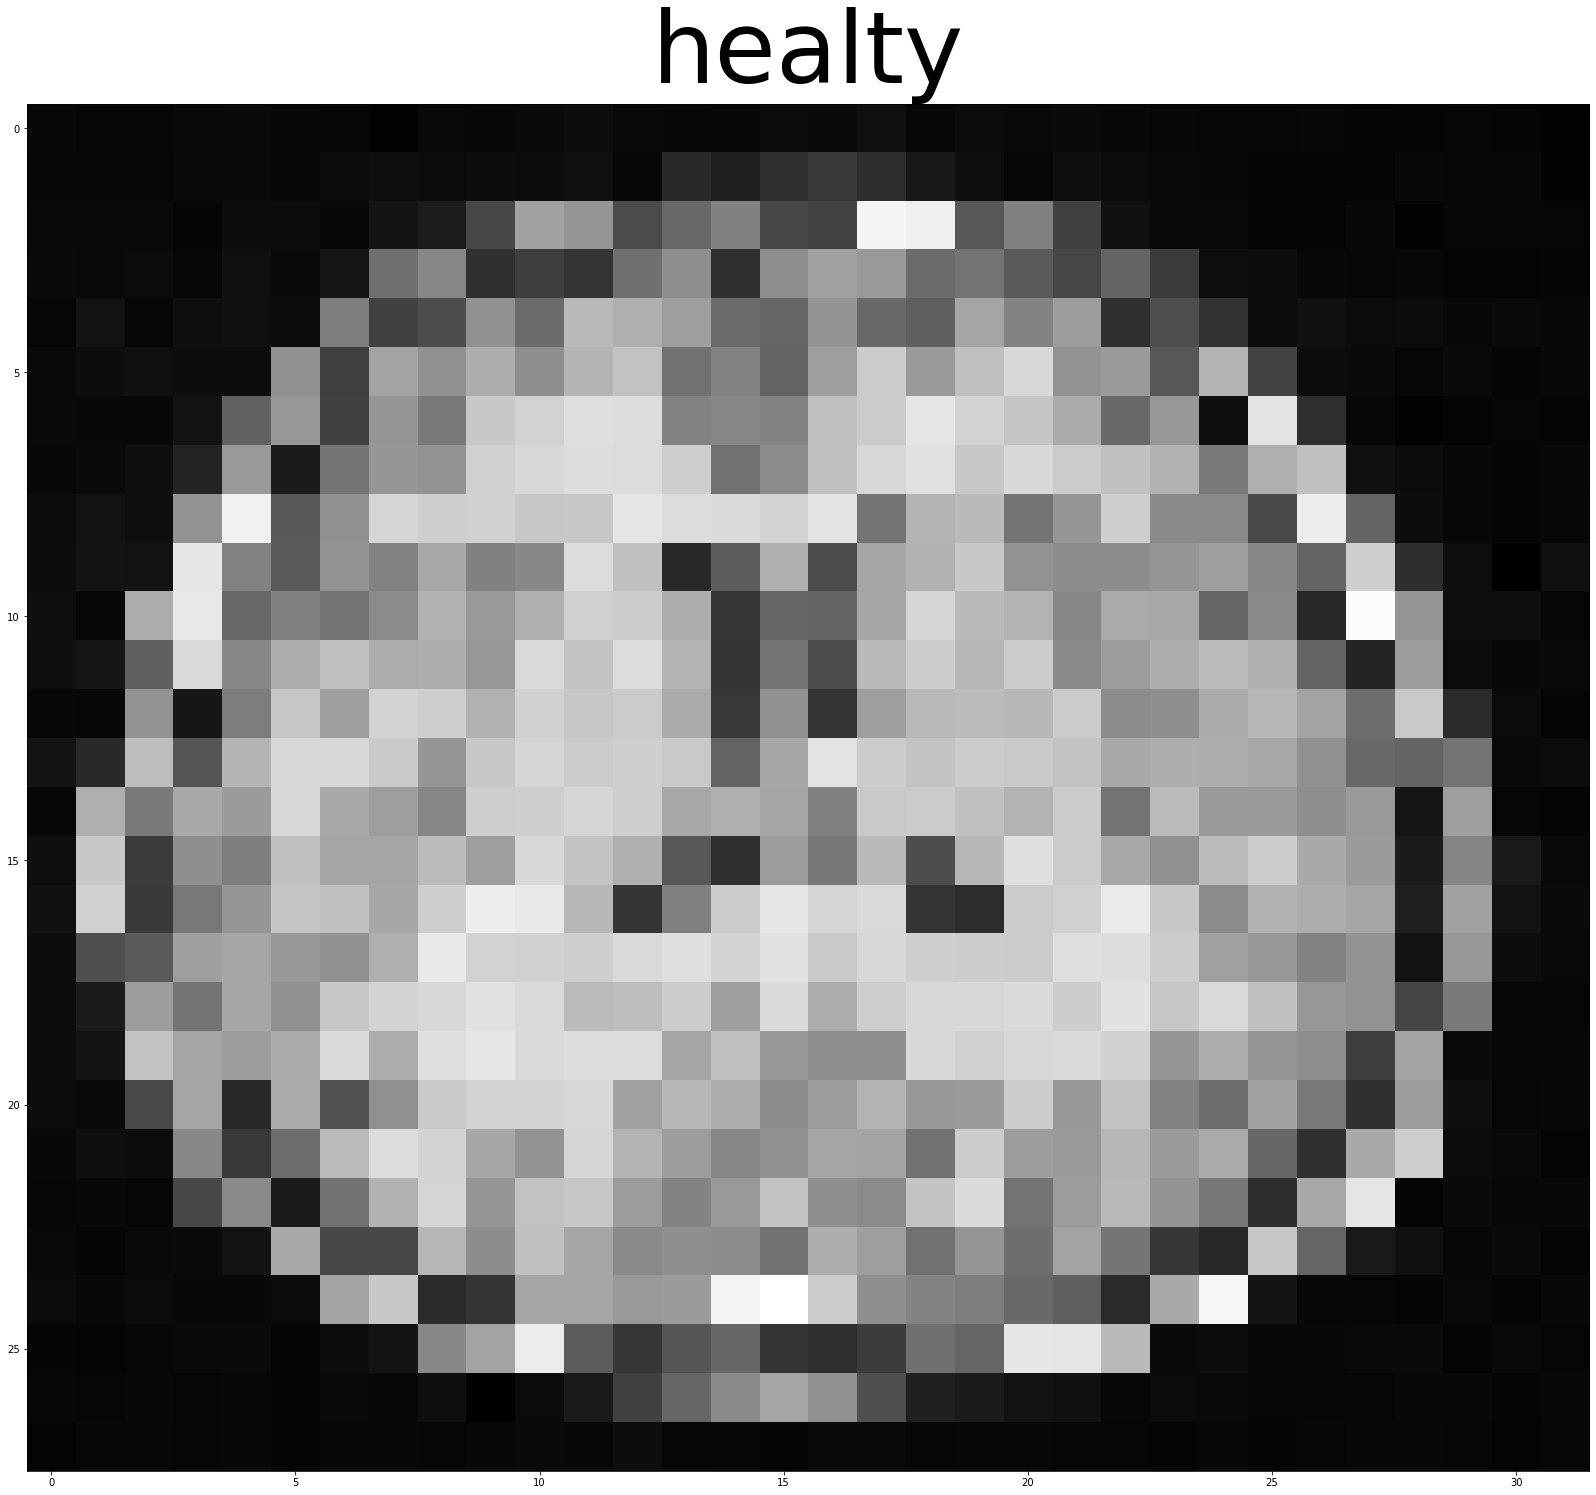

In [177]:
from skimage.color import rgb2gray
spull = test_ds.take(1)

images_test = []
labels_test = []
for images, labels in test_ds:
    images_test.append(images)
    labels_test.append(labels)
#plt.imshow(np.asanyarray(spull))
seed(time_ns())
test_IM = randint(0,len(images_test))
predictions = model.predict(images_test[test_IM])
img = rgb2gray(images_test[test_IM][0])
res = np.argmax(predictions)
show_res(img, res)
plt.show()






In [178]:
model.save("model.h5")